In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t

### Q.1

In [12]:
df = pd.read_csv("data.csv", sep = " ", names = ["year","gnp","invest","cpi","interest"])
df.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### Q.2

,year,gnp,invest,cpi,interest,gnp_log,invest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


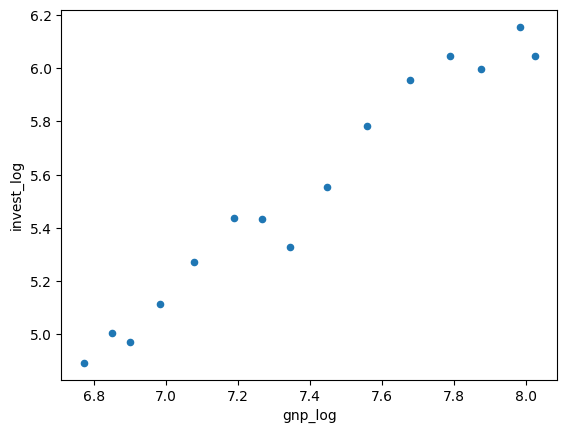

In [65]:
df = pd.read_csv("data.csv", sep = " ", names = ["year","gnp","invest","cpi","interest"])
df["gnp_log"] = df["gnp"].apply(lambda x : np.log(x))
df["invest_log"] = df["invest"].apply(lambda x : np.log(x))
df.plot.scatter(x="gnp_log",y="invest_log")
df.head(5)

### Q.3

$$ 
Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \newline \hat{\beta_0} = \overline{Y} - \hat{\beta_1} \overline{x} \newline
\hat{\beta_1} = \frac {\sum_{i=1}^{n}(x_i - \overline{x})(Y_i - \overline{Y})} {\sum_{i=1}^{n}(x_i - \overline{x})^2} 
$$

In [68]:
n = len(df.index)

gnp = df["gnp_log"].to_list()
invest = df["invest_log"].to_list()

invest_mean = 0
gnp_mean = 0
for i in range(n):
    invest_mean += invest[i]/n
    gnp_mean += gnp[i]/n

beta1, factor = 0,0
for i in range(n):
    beta1 += (gnp[i] - gnp_mean) * (invest[i] - invest_mean)
    factor += (gnp[i] - gnp_mean)**2
beta1 = beta1/factor

beta0 = invest_mean - beta1 * gnp_mean

sigma_squared = 0
for i in range(n):
    sigma_squared += (invest[i] - (beta0 + beta1*gnp[i]))**2
sigma_squared = sigma_squared/(n-2)

beta0_var = sigma_squared*(1/n + gnp_mean**2 / factor)
beta1_var = sigma_squared/factor

R2,factor2 = 0,0
for i in range(n): 
    R2 += (beta0 + beta1*gnp[i] - invest_mean)**2
    factor2 += (invest[i] - invest_mean)**2
R2 = R2/factor2

print("beta1 :", beta1,"|| beta1_variance :", beta1_var)
print("beta0 :", beta0,"|| beta0_variance :", beta0_var)
print("sigma_squared :", sigma_squared)
print("R2 :",R2)

beta1 : 1.015281401598871 || beta1_variance : 0.003067283374269269
beta0 : -1.9635913352301815 || beta0_variance : 0.1677289677260404
sigma_squared : 0.0076763385554603995
R2 : 0.9627572956057855


### Q.4

In [67]:
alpha = 0.05
t1 = -t.ppf(1-alpha/2,n - 2)
t2 = t.ppf(1-alpha/2,n - 2)
test_beta0 = beta0/(beta0_var**(1/2))
test_beta1 = beta1/(beta1_var**(1/2))
if test_beta0 > t1 and test_beta0 < t2:
    print("test valid for beta0")
else:
    print("test not valid for beta0")
if test_beta1 > t1 and test_beta1 < t2:
    print("test valid for beta1")
else:
    print("test not valid for beta1")

pval = 1 - t.cdf(test_beta1,n-2)

print("pval :",pval)

test not valid for beta0
test not valid for beta1
pval : 5.681854986505641e-11


### Q.5

In [70]:
gnp_test = np.log(1000)
invest_estimated = np.exp(beta0 + beta1*gnp_test)
print("For a gnp of 1000, the investment should be :",invest_estimated)

alpha = 0.1

CI1 = np.exp(beta0 + beta1 * gnp_test - t.ppf(1-alpha/2, n-2)*np.sqrt(sigma_squared)*np.sqrt(1/n+((gnp_test-gnp_mean)**2)/factor))
CI2 = np.exp(beta0 + beta1 * gnp_test + t.ppf(1-alpha/2, n-2)*np.sqrt(sigma_squared)*np.sqrt(1/n+((gnp_test-gnp_mean)**2)/factor))
PI1 = np.exp(beta0 + beta1 * gnp_test - t.ppf(1-alpha/2, n-2)*np.sqrt(sigma_squared)*np.sqrt(1+1/n+((gnp_test-gnp_mean)**2)/factor))
PI2 = np.exp(beta0 + beta1 * gnp_test + t.ppf(1-alpha/2, n-2)*np.sqrt(sigma_squared)*np.sqrt(1+1/n+((gnp_test-gnp_mean)**2)/factor))

print("Confidence interval : [",CI1,";",CI2,"]")
print("Prediction interval : [",PI1,";",PI2,"]")

For a gnp of 1000, the investment should be : 155.97942793105494
Confidence interval : [ 146.67552673421952 ; 165.8734928682758 ]
Prediction interval : [ 132.00238933412936 ; 184.31167845087424 ]


### Q.6

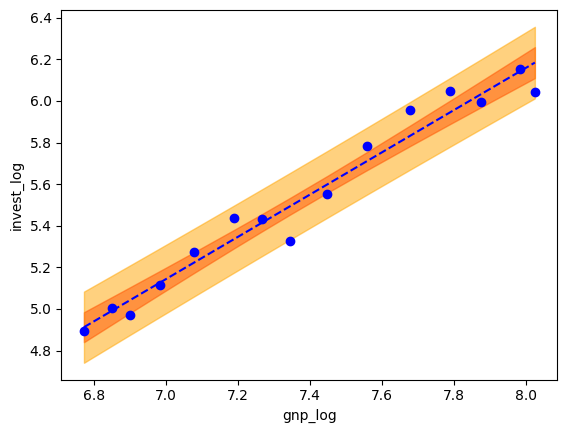

In [98]:
def ci(gnp_est):
    return t.ppf(1-alpha/2, n-2)*np.sqrt(sigma_squared)*np.sqrt(1/n+((gnp_est)-gnp_mean)**2/factor)

def pi(gnp_est):
    return t.ppf(1-alpha/2, n-2)*np.sqrt(sigma_squared)*np.sqrt(1+1/n+((gnp_est)-gnp_mean)**2/factor)

def estimation(x):
    return beta0 + beta1*x

plt.plot(df['gnp_log'], df['invest_log'], 'bo', df['gnp_log'], estimation(df['gnp_log']), 'b--')

plt.fill_between(df['gnp_log'], estimation(df['gnp_log'])-ci(df['gnp_log']), estimation(df['gnp_log'])+ci(df['gnp_log']), color='red', alpha=0.5)

plt.fill_between(df['gnp_log'], estimation(df['gnp_log'])-pi(df['gnp_log']), estimation(df['gnp_log'])+pi(df['gnp_log']), color='orange', alpha=0.5)


plt.xlabel('gnp_log')
plt.ylabel('invest_log')
plt.show()

### Q.7

In [106]:
gnp2 = [[gnp[i]] for i in range(n)]

reg = LinearRegression().fit(gnp2,invest)
print("beta_1: ", reg.coef_[0],"\nbeta_0: ", reg.intercept_,"\nDetermination coefficient: ", np.sqrt(reg.score(gnp2, invest)),"\nInvestment predicted: ", np.exp(reg.predict(np.array([[np.log(1000)]])))[0])

print("The results coincide with what was found 'by hand'")

beta_1:  1.0152814015988711 
beta_0:  -1.9635913352301833 
Determination coefficient:  0.9812019647380378 
Investment predicted:  155.97942793105494
The results coincide with what was found 'by hand'


### Q.8 

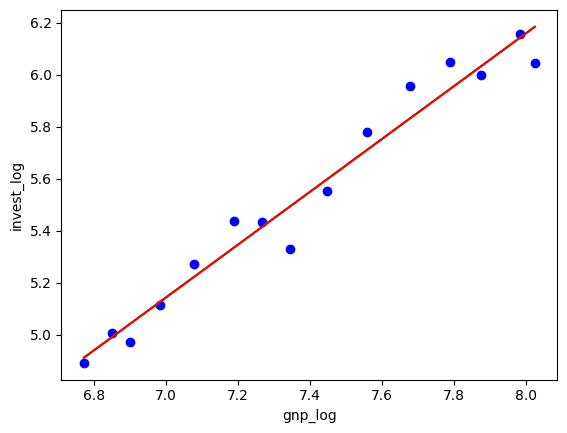

The two slopes are on top of each other


In [113]:
def reg_predict(x):
    return reg.coef_[0]*x + reg.intercept_

plt.plot(df['gnp_log'], df['invest_log'], 'bo', df['gnp_log'],estimation(df['gnp_log']),'g', df['gnp_log'], reg_predict(df['gnp_log']), 'r')

plt.xlabel('gnp_log')
plt.ylabel('invest_log')
plt.show()

print("The two slopes are on top of each other")

### Q.9

In [130]:
gnp_log_interest = df[['gnp_log','interest']]
invest_log = df['invest_log']
gnp_log_interest["intercept"] = 1
gnp_log_interest = gnp_log_interest[['intercept','gnp_log','interest']]

gram = np.dot(gnp_log_interest.values.transpose(), gnp_log_interest.values)/invest_log.size

C:\Users\boite\AppData\Local\Temp\ipykernel_2700\3955368886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gnp_log_interest["intercept"] = 1


In [131]:
rank = np.linalg.matrix_rank(gram)

if rank == 3 :
    print("The associated Gram matrix is of full rank")
else :
    print("The associated Gram matrix isn't of full rank")

The associated Gram matrix is of full rank


### Q.10

In [134]:
theta = np.linalg.inv(np.dot(gnp_log_interest.values.transpose(), gnp_log_interest.values)).dot(gnp_log_interest.values.transpose()).dot(invest_log.values)

sigma_squared2 = sum((invest_log-np.dot(gnp_log_interest.values, theta))**2)/(n-(2+1))

C = sigma_squared2*np.linalg.inv(np.dot(gnp_log_interest.values.transpose(), gnp_log_interest.values))

R = np.sqrt(sum((np.dot(gnp_log_interest.values, theta)-invest_log.mean())**2)/sum((invest_log-invest_log.mean())**2))
